In [1]:
import yfinance as yf
import pandas as pd
import hvplot.pandas
import pandas_datareader as pdr
import matplotlib.pyplot as plot
import matplotlib.ticker as mtick
import seaborn as sns
from scipy import stats
from tabulate import tabulate
from pathlib import Path
from MCForecastTools import MCSimulation
%matplotlib inline

ModuleNotFoundError: No module named 'yfinance'

In [ ]:
initial_investment = 100000

In [ ]:
# set risk from integer 1 to 5 to choose risk level and weighting of stocks

risk = 2

if risk == 1:
    weights = [.1, .1, .1, .1, .1, .1, .1, .1, .1, .1]
elif risk == 2:
    weights = [.05, .15, .15, .05, .1, .1, .1, .1, .1, .1]
elif risk == 3:
    weights = [.05, .15, .15, .05, .02, .18, .1, .1, .1, .1]
elif risk == 4:
    weights = [.05, .15, .15, .05, .02, .18, .12, .08, .1, .1]
elif risk == 5:
    weights = [.05, .15, .15, .05, .02, .18, .12, .08, .01, .19]

In [ ]:
weights

[0.05, 0.15, 0.15, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [ ]:
# Create our portfolio of equities
#creating a list of stocks
tickers_list = ["AAPL", "TSLA", "NKE", "AMZN", "WMT", "LDOS", "INCY", "NBIX", "KO", "AIZ"]

In [ ]:
df_list = list()
for ticker in tickers_list:
    data = yf.download(ticker, group_by="Ticker", period='5y')
    # add this column because the dataframe doesn't contain a column with the ticker
    data['ticker'] = ticker 
    df_list.append(data)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# combining dataframes
df_ticker = pd.concat(df_list)
df_ticker.sort_values (by = ['ticker'])

,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
2017-10-02,38.564999,38.612499,38.180000,38.452499,36.493935,74795200,AAPL
2021-02-08,136.029999,136.960007,134.919998,136.910004,135.712875,71297200,AAPL
2021-02-05,137.350006,137.419998,135.860001,136.759995,135.564209,75693800,AAPL
2021-02-04,136.300003,137.399994,134.589996,137.389999,135.985489,84183100,AAPL
2021-02-03,135.759995,135.770004,133.610001,133.940002,132.570770,89880900,AAPL
...,...,...,...,...,...,...,...
2019-05-31,101.349998,102.019997,100.599998,101.440002,96.150475,5927500,WMT
2019-05-30,102.489998,103.489998,101.910004,102.190002,96.861382,5019600,WMT
2019-05-29,102.110001,102.879997,101.470001,102.120003,96.795036,6520200,WMT


In [ ]:
# Reorganize the DataFrame
# Separate ticker data
AAPL = df_ticker[df_ticker['ticker']=='AAPL'].drop('ticker', axis=1)
AIZ = df_ticker[df_ticker['ticker']=='AIZ'].drop('ticker', axis=1)
AMZN = df_ticker[df_ticker['ticker']=='AMZN'].drop('ticker', axis=1)
INCY = df_ticker[df_ticker['ticker']=='INCY'].drop('ticker', axis=1)
KO = df_ticker[df_ticker['ticker']=='KO'].drop('ticker', axis=1)
LDOS = df_ticker[df_ticker['ticker']=='LDOS'].drop('ticker', axis=1)
NBIX = df_ticker[df_ticker['ticker']=='NBIX'].drop('ticker', axis=1)
NKE = df_ticker[df_ticker['ticker']=='NKE'].drop('ticker', axis=1)
TSLA = df_ticker[df_ticker['ticker']=='TSLA'].drop('ticker', axis=1)
WMT = df_ticker[df_ticker['ticker']=='WMT'].drop('ticker', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([AAPL, AIZ, AMZN, INCY, KO, LDOS, NBIX, NKE, TSLA, WMT], axis=1,
                      keys=["AAPL", "AIZ", "AMZN", "INCY", "KO", "LDOS", "NBIX", "NKE",
                           "TSLA", "WMT"])

# Display sample data
df_ticker

AAPL                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2017-10-02   38.564999   38.612499   38.180000   38.452499   36.493935   
2017-10-03   38.502499   38.772499   38.477501   38.619999   36.652912   
2017-10-04   38.407501   38.465000   38.115002   38.369999   36.415634   
2017-10-05   38.544998   38.860001   38.512501   38.847500   36.868820   
2017-10-06   38.742500   38.872501   38.639999   38.825001   36.847462   
...                ...         ...         ...         ...         ...   
2022-09-26  149.660004  153.770004  149.639999  150.770004  150.770004   
2022-09-27  152.740005  154.720001  149.949997  151.759995  151.759995   
2022-09-28  147.639999  150.639999  144.839996  149.839996  149.839996   
2022-09-29  146.100006  146.720001  140.679993  142.479996  142.479996   
2022-09-30  141.279999  143.100006  138.000000  138.199997  138.199997   

                              AIZ                                      ...  \
               Volume        Open        High         Low       Close  ...   
Date                                                                   ...   
2017-10-02   74795200   95.620003   95.830002   95.070000   95.660004  ...   
2017-10-03   64921200   95.489998   95.860001   94.440002   95.699997  ...   
2017-10-04   80655200   95.570000   95.949997   94.900002   95.290001  ...   
2017-10-05   85135200   95.209999   96.160004   95.209999   95.489998  ...   
2017-10-06   69630400   95.849998   96.169998   95.290001   96.040001  ...   
...               ...         ...         ...         ...         ...  ...   
2022-09-26   93339400  147.080002  148.929993  144.619995  146.169998  ...   
2022-09-27   84442700  147.339996  148.500000  145.539993  147.460007  ...   
2022-09-28  146691400  148.460007  150.410004  148.059998  149.460007  ...   
2022-09-29  128138200  148.690002  149.350006  146.380005  147.750000  ...   
2022-09-30  124705400  148.130005  149.350006  145.020004  145.270004  ...   

                  TSLA                                            WMT  \
                   Low       Close   Adj Close     Volume        Open   
Date                                                                    
2017-10-02   22.367332   22.768667   22.768667   79302000   77.900002   
2017-10-03   22.085333   23.209333   23.209333  152304000   78.830002   
2017-10-04   23.306667   23.667334   23.667334  122452500   79.269997   
2017-10-05   23.423332   23.688667   23.688667   62575500   79.169998   
2017-10-06   23.483334   23.792000   23.792000   64462500   78.779999   
...                ...         ...         ...        ...         ...   
2022-09-26  270.309998  276.010010  276.010010   58076900  128.750000   
2022-09-27  277.510010  282.940002  282.940002   61925200  132.229996   
2022-09-28  277.570007  287.809998  287.809998   54664800  131.410004   
2022-09-29  265.779999  268.209991  268.209991   77620600  133.500000   
2022-09-30  262.470001  265.250000  265.250000   67517800  132.240005   

                                                                     
                  High         Low       Close   Adj Close   Volume  
Date                                                                 
2017-10-02   78.830002   77.500000   78.449997   71.488007  7709200  
2017-10-03   79.660004   78.750000   79.220001   72.189667  7936700  
2017-10-04   79.779999   79.070000   79.089996   72.071213  6173400  
2017-10-05   79.809998   79.080002   79.410004   72.362816  5138700  
2017-10-06   79.169998   78.250000   79.000000   71.989197  6246700  
...                ...         ...         ...         ...      ...  
2022-09-26  132.139999  128.270004  131.309998  131.309998  7670400  
2022-09-27  133.429993  130.300003  130.949997  130.949997  5723900  
2022-09-28  133.649994  129.720001  133.110001  133.110001  5612800  
2022-09-29  134.119995  1

In [ ]:
#rename close column so monte carlo sim library picks it up
df_ticker = df_ticker.rename(columns={'Close': 'close'})

df_ticker.head(1)

AAPL                                                    \
                 Open       High    Low      close  Adj Close    Volume   
Date                                                                      
2017-10-02  38.564999  38.612499  38.18  38.452499  36.493935  74795200   

                  AIZ                               ...       TSLA             \
                 Open       High    Low      close  ...        Low      close   
Date                                                ...                         
2017-10-02  95.620003  95.830002  95.07  95.660004  ...  22.367332  22.768667   

                                       WMT                              \
            Adj Close    Volume       Open       High   Low      close   
Date                                                                     
2017-10-02  22.768667  79302000  77.900002  78.830002  77.5  78.449997   

                                
            Adj Close   Volume  
Date                            
2017-10-02  71.488007  7709200  

[1 rows x 60 columns]

In [ ]:
# Configuring a Monte Carlo simulation of chosen portfolio to forecast five years cumulative returns
MC_fiveyear_port = MCSimulation(
    portfolio_data = df_ticker,
    weights = weights,
    num_simulation = 500,
    num_trading_days = 252*5
)

In [ ]:
# Printing the simulation input data
MC_fiveyear_port.portfolio_data.head()

AAPL                                                        \
                 Open       High        Low      close  Adj Close    Volume   
Date                                                                          
2017-10-02  38.564999  38.612499  38.180000  38.452499  36.493935  74795200   
2017-10-03  38.502499  38.772499  38.477501  38.619999  36.652912  64921200   
2017-10-04  38.407501  38.465000  38.115002  38.369999  36.415634  80655200   
2017-10-05  38.544998  38.860001  38.512501  38.847500  36.868820  85135200   
2017-10-06  38.742500  38.872501  38.639999  38.825001  36.847462  69630400   

                               AIZ                        ...       TSLA  \
           daily_return       Open       High        Low  ...  Adj Close   
Date                                                      ...              
2017-10-02          NaN  95.620003  95.830002  95.070000  ...  22.768667   
2017-10-03     0.004356  95.489998  95.860001  94.440002  ...  23.209333   
2017-10-04    -0.006473  95.570000  95.949997  94.900002  ...  23.667334   
2017-10-05     0.012445  95.209999  96.160004  95.209999  ...  23.688667   
2017-10-06    -0.000579  95.849998  96.169998  95.290001  ...  23.792000   

                                          WMT                        \
               Volume daily_return       Open       High        Low   
Date                                                                  
2017-10-02   79302000          NaN  77.900002  78.830002  77.500000   
2017-10-03  152304000     0.019354  78.830002  79.660004  78.750000   
2017-10-04  122452500     0.019733  79.269997  79.779999  79.070000   
2017-10-05   62575500     0.000901  79.169998  79.809998  79.080002   
2017-10-06   64462500     0.004362  78.779999  79.169998  78.250000   

                                                        
                close  Adj Close   Volume daily_return  
Date                                                    
2017-10-02  78.449997  71.488007  7709200          NaN  
2017-10-03  79.220001  72.189667  7936700     0.009815  
2017-10-04  79.089996  72.071213  6173400    -0.001641  
2017-10-05  79.410004  72.362816  5138700     0.004046  
2017-10-06  79.000000  71.989197  6246700    -0.005163  

[5 rows x 70 columns]

In [ ]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear_port.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\TechFast Australia\Desktop\Jupyter-Workspace\Project 1\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004871,0.982848,0.998658,1.005593,1.009136,1.014847,0.995897,0.994510,0.992027,0.997680,...,1.007737,0.991933,0.993165,1.005545,1.013249,1.004740,1.007784,1.002706,1.006327,0.997997
2,1.016045,0.995170,0.989373,1.001460,1.015125,1.018819,0.999043,0.992120,0.982280,0.991940,...,1.007887,0.994794,0.990115,0.997944,1.014039,1.005153,1.003941,0.998403,0.998819,0.988423
3,1.023835,0.966993,0.990297,1.012008,1.006525,1.022450,1.002367,1.001468,0.984908,0.993391,...,1.005981,0.983733,0.988652,1.013465,1.030645,1.001529,1.002546,1.003224,1.003151,0.986558
4,1.034731,0.966555,0.984119,1.007732,1.004707,1.028788,1.024994,1.013207,0.982917,0.986077,...,1.024257,0.981503,0.987436,1.014172,1.030893,1.002757,1.002171,1.008260,0.993197,0.989612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.114099,1.969727,3.617209,2.111590,2.805661,1.644078,2.027203,2.023044,2.143741,2.266287,...,2.678469,1.984948,2.952827,4.826618,3.847116,3.725126,2.001373,2.168675,3.706571,1.957130
1257,3.153737,1.970256,3.600814,2.093041,2.820821,1.621128,2.012822,2.024896,2.134901,2.248494,...,2.712868,1.958123,2.978038,4.808984,3.848024,3.717147,1.982352,2.140025,3.682498,1.956631
1258,3.166565,1.954567,3.600473,2.087812,2.748102,1.602564,2.013755,2.009509,2.137275,2.261675,...,2.716206,1.966711,2.975722,4.800320,3.853327,3.710783,1.971628,2.119237,3.676386,1.978014
1259,3.196546,1.960540,3.607944,2.094013,2.781433,1.594599,1.998775,2.005154,2.140180,2.299901,...,2.698526,1.960231,2.978215,4.789063,3.836404,3.670460,1.979399,2.115178,3.713807,1.982493


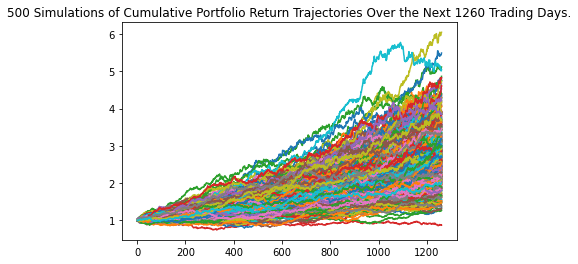

In [ ]:
# Plot simulation outcomes
line_plot_port = MC_fiveyear_port.plot_simulation()

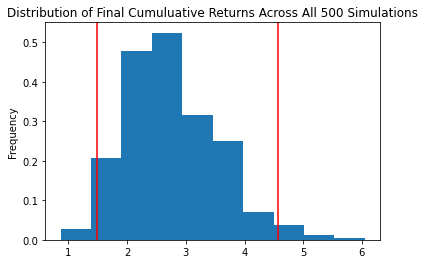

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot_port = MC_fiveyear_port.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_port = MC_fiveyear_port.summarize_cumulative_return()

# Print summary statistics
print(tbl_port)

count           500.000000
mean              2.760259
std               0.783287
min               0.865418
25%               2.182107
50%               2.672244
75%               3.254005
max               6.050326
95% CI Lower      1.485497
95% CI Upper      4.566987
Name: 1260, dtype: float64


### S&P 500 Montecarlo Sim

In [ ]:
# Get S&P 500 price data
SP500_data = yf.download("SPY", group_by="Ticker", period='5y')

# Rename close column so monte carlo sim library picks it up
SP500_data = SP500_data.rename(columns={'Close': 'close'})

# Add ticker column
SP500_data['ticker'] = "SPY"

SP500_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,close,Adj Close,Volume,ticker
Date,,,,,,,
2017-10-02,251.490005,252.320007,251.289993,252.320007,231.543655,59023000,SPY
2017-10-03,252.320007,252.889999,252.229996,252.860001,232.039169,66810200,SPY
2017-10-04,252.690002,253.440002,252.559998,253.160004,232.314453,55953600,SPY
2017-10-05,253.539993,254.679993,253.199997,254.660004,233.690964,63522800,SPY
2017-10-06,254.149994,254.699997,253.850006,254.369995,233.424820,80646000,SPY


In [ ]:
# Separate ticker data
SP500 = SP500_data[SP500_data['ticker']=='SPY'].drop('ticker', axis=1)

# Concatenate the ticker DataFrames
SP500 = pd.concat([SP500], axis=1, keys=["SPY"])

In [ ]:
# Configuring a Monte Carlo simulation of chosen portfolio to forecast five years cumulative returns
MC_fiveyear_SP500 = MCSimulation(
    portfolio_data = SP500,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [ ]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear_SP500.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\TechFast Australia\Desktop\Jupyter-Workspace\Project 1\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000739,1.010025,0.996654,0.978553,0.985984,1.012492,0.989261,0.985287,1.042145,0.993360,...,1.002574,1.009380,1.016680,1.002000,0.973548,0.994600,0.977607,1.022835,1.005776,0.992565
2,1.020267,1.005948,1.010582,1.006372,0.985109,0.987455,0.995496,0.966407,1.032737,0.997171,...,0.985778,0.996473,1.007956,0.992143,0.994816,0.995836,0.988438,1.009660,1.008043,0.993964
3,1.022726,1.012708,1.022100,1.023980,0.970892,0.985755,0.999894,0.964408,1.036277,0.995075,...,0.986152,1.007865,0.988777,1.007388,0.982177,1.000422,0.991013,0.993922,1.014886,1.003384
4,1.010802,1.006395,1.013388,0.996542,0.979665,1.000655,1.005835,0.953677,1.058479,1.035915,...,0.974233,1.022569,0.982234,1.008143,0.967506,0.979882,0.977470,0.999595,1.008088,1.020085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.717474,1.155151,1.496911,1.872638,0.689014,1.791358,1.158218,1.585816,0.801087,1.694019,...,1.333003,1.230722,0.614091,0.749515,1.346233,2.564654,1.406738,1.137752,2.101762,4.111714
1257,1.702698,1.176740,1.519359,1.880754,0.691526,1.832098,1.156516,1.579675,0.805220,1.662919,...,1.357011,1.244943,0.608065,0.749610,1.327002,2.573111,1.427684,1.136314,2.125366,4.142371
1258,1.678553,1.187581,1.507999,1.890858,0.705767,1.834052,1.172443,1.603059,0.811824,1.657261,...,1.354505,1.259341,0.606030,0.748427,1.319936,2.577378,1.420408,1.141346,2.170003,4.068438
1259,1.677575,1.187432,1.507022,1.917062,0.693464,1.841534,1.182182,1.621665,0.800305,1.628829,...,1.341130,1.268611,0.623373,0.750739,1.331682,2.557261,1.396119,1.121619,2.179448,3.973850


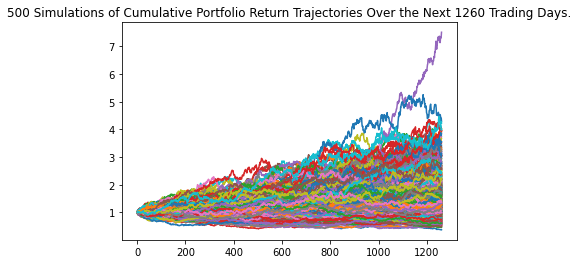

In [ ]:
# Plot simulation outcomes
line_plot_SP500 = MC_fiveyear_SP500.plot_simulation()

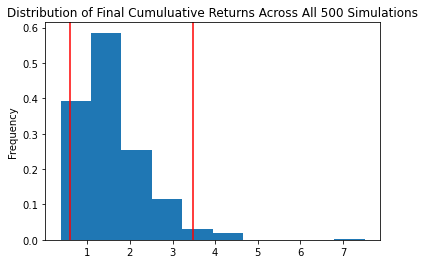

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot_SP500 = MC_fiveyear_SP500.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_SP500 = MC_fiveyear_SP500.summarize_cumulative_return()

# Print summary statistics
print(tbl_SP500)

count           500.000000
mean              1.582372
std               0.788593
min               0.372845
25%               1.029872
50%               1.394538
75%               1.967382
max               7.512550
95% CI Lower      0.587681
95% CI Upper      3.472097
Name: 1260, dtype: float64


### Montecarlo Sim Comparisons

In [ ]:
## Compare summary statistics

table_data = {'Portfolio' : [round(tbl_port[1]*initial_investment,2),round(tbl_port[2],5), round(tbl_port[3]*initial_investment,2),
                             round(tbl_port[7]*initial_investment,2), round(tbl_port[8]*initial_investment,2),
                             round(tbl_port[9]*initial_investment,2)],
              'S&P 500' : [round(tbl_SP500[1]*initial_investment,2), round(tbl_SP500[2],5), round(tbl_SP500[3]*initial_investment,2), 
                           round(tbl_SP500[7]*initial_investment,2), round(tbl_SP500[8]*initial_investment,2), 
                           round(tbl_SP500[9]*initial_investment,2)],
              'Statistic' : ["Expected Return", "Standard Deviation", "Minimum", "Maximum", "95% CI Lower", "95% CI Upper"]
             }

table_data_df = pd.DataFrame(table_data).set_index('Statistic')
            

table_data_df

,Portfolio,S&P 500
Statistic,,
Expected Return,276025.88000,158237.19000
Standard Deviation,0.78329,0.78859
Minimum,86541.75000,37284.53000
Maximum,605032.57000,751255.04000
95% CI Lower,148549.73000,58768.12000
95% CI Upper,456698.73000,347209.67000


In [ ]:
# Compare expected return


print("The expected return of your portfolio is", (round(tbl_port[1]-1,3)*100), "%.")
print("The expected return of the S&P 500  is", round(tbl_SP500[1]-1,3)*100, "%.")

if tbl_port[1] > tbl_SP500[1]:
    print("Your portfolio is expected to beat the S&P 500 by", round((tbl_port[1]-1)*100 - (tbl_SP500[1]-1)*100 ,3), "%.")
else: 
    print("The S&P 500 is expected to beat your portfolio by", round((tbl_port[1]-1)*100 - (tbl_SP500[1]-1)*100 ,3), "%.")

if tbl_port[1] > 1:
    print("From your initial investment  of $" + str(initial_investment) + ", your total expected portfolio value is $" + str(initial_investment*tbl_port[1]) + " therefore a gain of $" + str(initial_investment*tbl_port[1]-initial_investment))
else:
    print("From your initial investment  of $" + str(initial_investment) + ", your total expected portfolio value is $"+ str(initial_investment*tbl_port[1]) + " therefore a loss of $" + str(initial_investment*tbl_port[1]-initial_investment))


The expected return of your portfolio is 176.0 %.
The expected return of the S&P 500  is 58.199999999999996 %.
Your portfolio is expected to beat the S&P 500 by 117.789 %.
From your initial investment  of $100000, your total expected portfolio value is $276025.8848396574 therefore a gain of $176025.8848396574


In [ ]:
# Compare standard deviation

print("The expected standard deviation of your portfolio is", round(tbl_port[2],3))
print("The expected standard deviation of the S&P 500  is", round(tbl_SP500[2],3))

if tbl_port[2] > tbl_SP500[2]:
    print("As your expected standard deviation is higher than the S&P 500 there is more volatility in your portfolio, hence there is more risk you are taking on.")
else:
    print("As your expected standard deviation is lower than the S&P 500 there is less volatility in your portfolio, hence less risk you are taking on.")

The expected standard deviation of your portfolio is 0.783
The expected standard deviation of the S&P 500  is 0.789
As your expected standard deviation is lower than the S&P 500 there is less volatility in your portfolio, hence less risk you are taking on.


### Initial Investment Returns Comparison

In [ ]:
expected_return_port = tbl_port[1]*initial_investment
expected_return_SP500 = tbl_SP500[1]*initial_investment

display(expected_return_SP500)
display(expected_return_port)

158237.1940955689

276025.8848396574

<AxesSubplot:title={'center':'Returns of Portfolio and S&P 500 vs Initial Investment'}, ylabel='Dollars (USD)'>

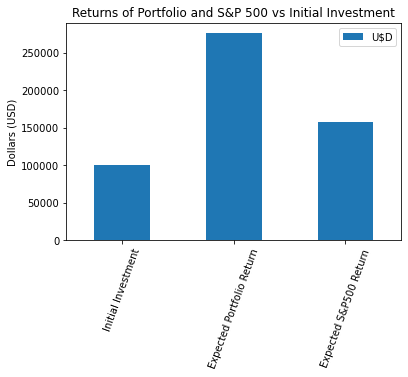

In [ ]:
# Create dictionary

data_returns = {"X":["Initial Investment", "Expected Portfolio Return", "Expected S&P500 Return"],

        "U$D":[initial_investment, (expected_return_port), (expected_return_SP500)]

        }

# Convert dictionary to dataframe

data_returns_df = pd.DataFrame(data=data_returns)

# Bar chart

data_returns_df.plot.bar(x = "X", y = "U$D", rot = 70, title = "Returns of Portfolio and S&P 500 vs Initial Investment", xlabel = ""
                        ,ylabel = "Dollars (USD)")

## Calculating Alpha & Beta

In [ ]:
# Get price info

price_data = pdr.get_data_yahoo(tickers_list,
                               start = '2018-01-01',
                               end = '2022-03-01')
price_data = price_data['Close']

price_data.head()

Symbols,AAPL,TSLA,NKE,AMZN,WMT,LDOS,INCY,NBIX,KO,AIZ
Date,,,,,,,,,,
2018-01-02,43.064999,21.368668,63.490002,59.450500,98.589996,64.000000,100.889999,79.300003,45.540001,99.230003
2018-01-03,43.057499,21.150000,63.480000,60.209999,99.449997,63.919998,100.980003,82.980003,45.439999,99.510002
2018-01-04,43.257500,20.974667,63.439999,60.479500,99.540001,64.800003,98.440002,80.279999,46.080002,100.050003
2018-01-05,43.750000,21.105333,63.980000,61.457001,100.129997,64.730003,99.849998,81.730003,46.070000,101.309998
2018-01-08,43.587502,22.427334,64.550003,62.343498,101.610001,66.379997,100.809998,77.809998,46.000000,99.699997


In [ ]:
# Calculate daily returns

returns = price_data.pct_change()[1:]

returns.head()

Symbols,AAPL,TSLA,NKE,AMZN,WMT,LDOS,INCY,NBIX,KO,AIZ
Date,,,,,,,,,,
2018-01-03,-0.000174,-0.010233,-0.000158,0.012775,0.008723,-0.001250,0.000892,0.046406,-0.002196,0.002822
2018-01-04,0.004645,-0.008290,-0.000630,0.004476,0.000905,0.013767,-0.025154,-0.032538,0.014085,0.005427
2018-01-05,0.011385,0.006230,0.008512,0.016163,0.005927,-0.001080,0.014323,0.018062,-0.000217,0.012594
2018-01-08,-0.003714,0.062638,0.008909,0.014425,0.014781,0.025490,0.009614,-0.047963,-0.001519,-0.015892
2018-01-09,-0.000115,-0.008085,-0.007126,0.004676,-0.012007,-0.002109,-0.044837,0.022234,0.005000,-0.005918


In [ ]:
# Calculate portfolio return

portfolio_return = (returns * weights).sum(axis = 1)

portfolio_return.head()

Date
2018-01-03    0.004611
2018-01-04   -0.003233
2018-01-05    0.008550
2018-01-08    0.009719
2018-01-09   -0.005817
dtype: float64

In [ ]:
# Get benchmark returns (S&P 500)

benchmark_price = pdr.get_data_yahoo('SPY',
                               start = '2018-01-01',
                               end = '2022-03-01')
                               
benchmark_return = benchmark_price["Close"].pct_change()[1:]

benchmark_return.head()

Date
2018-01-03    0.006325
2018-01-04    0.004215
2018-01-05    0.006664
2018-01-08    0.001829
2018-01-09    0.002263
Name: Close, dtype: float64

D:\Anaconda\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Portfolio vs S&P500 Returns')

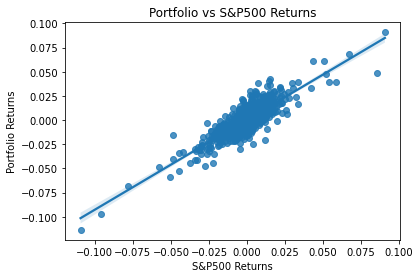

In [ ]:
# Plot beta against benchmark

sns.regplot(benchmark_return.values, portfolio_return.values)
plot.xlabel("S&P500 Returns")
plot.ylabel("Portfolio Returns")
plot.title("Portfolio vs S&P500 Returns")

In [ ]:
# Use linear regression model to calculate beta/alpha

(beta, alpha) = stats.linregress(benchmark_return.values,
                portfolio_return.values)[0:2]

print("Portfolio beta is", round(beta, 5))
print("Portfolio alpha is", round(alpha, 5))

Portfolio beta is 0.93173
Portfolio alpha is 0.00051


In [ ]:
print("For every 1% move in the S&P 500, your portfolio will move",  round(1+alpha, 5),"%.")
print("Portfolio beta is", round(beta,5), "meaning your portfolio is less volatile than the S&P 500 by", 
    round((1-beta)*100,5), "%")

For every 1% move in the S&P 500, your portfolio will move 1.00051 %.
Portfolio beta is 0.93173 meaning your portfolio is less volatile than the S&P 500 by 6.82691 %


### Correltation of Shares

In [ ]:
# Correlation of each stock pair

correlation = returns.corr()

correlation

Symbols,AAPL,TSLA,NKE,AMZN,WMT,LDOS,INCY,NBIX,KO,AIZ
Symbols,,,,,,,,,,
AAPL,1.000000,0.425462,0.486450,0.634071,0.387424,0.410863,0.375181,0.336159,0.391199,0.372032
TSLA,0.425462,1.000000,0.292788,0.388613,0.154303,0.248244,0.252314,0.243035,0.181598,0.207286
NKE,0.486450,0.292788,1.000000,0.381538,0.289505,0.439279,0.270563,0.272953,0.444807,0.455970
AMZN,0.634071,0.388613,0.381538,1.000000,0.313130,0.252840,0.365055,0.336887,0.215373,0.260596
WMT,0.387424,0.154303,0.289505,0.313130,1.000000,0.316820,0.216179,0.159738,0.386643,0.327568
LDOS,0.410863,0.248244,0.439279,0.252840,0.316820,1.000000,0.311620,0.297614,0.517861,0.485734
INCY,0.375181,0.252314,0.270563,0.365055,0.216179,0.311620,1.000000,0.415986,0.205028,0.227235
NBIX,0.336159,0.243035,0.272953,0.336887,0.159738,0.297614,0.415986,1.000000,0.173427,0.246012
KO,0.391199,0.181598,0.444807,0.215373,0.386643,0.517861,0.205028,0.173427,1.000000,0.477392


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

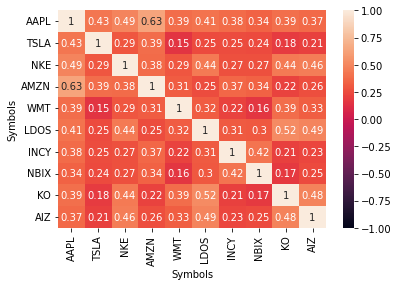

In [ ]:
# Create a heatmap from the correlation values
sns.heatmap(correlation, vmin=-1, vmax=1, annot = True)

### Current Standard Deviation

In [2]:
# Calculate standard deviation of own portfolio

portfolio_std = benchmark_return.values.std()


# Calculate standard devation of S&P 500.

SP500_std = portfolio_return.values.std()



NameError: name 'benchmark_return' is not defined

In [1]:
# Check to see which is riskier
print("Your current portfolio standard deviation is " + str(round(portfolio_std), 4))
print("Current S&P 500 standard deviation is " + str(SP500_std))

if portfolio_std > SP500_std:
    print("Currently, your portfolio is risker than S&P 500")
else: 
    print("Currently, the S&P 500 is riskier than your portfolio")

NameError: name 'portfolio_std' is not defined